## 📊 Wine Quality Dataset Preprocessing
In this notebook, I would prepare the wine dataset for modelling.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("../dataset/full-wine.csv", index_col=0)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
# Removing spaces in column names and replacing with underscores between words
df.columns = df.columns.str.strip().str.replace(r"\s+", "_", regex=True)
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [4]:
df.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
4363,7.1,0.31,0.25,11.2,0.048,32.0,136.0,0.99663,3.14,0.40,9.5,5,white
2613,6.6,0.36,0.52,10.1,0.050,29.0,140.0,0.99628,3.07,0.40,9.4,5,white
1236,6.8,0.32,0.37,3.4,0.023,19.0,87.0,0.99020,3.14,0.53,12.7,6,white


In [5]:
# Checking for duplicated values
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 1177


In [6]:
# Drop duplicates (keeping the fist occurences)
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(5320, 13)

From the <a>data exploration</a> notebook, the plot below shows that the target variable 'quality' is highly imbalanced. 

I would change the quality to be a binary column to show values of 0 and 1. The criteria would be `x >= 7` for high quality wines, and `x <= 6` for low quality wines.

Then, I would use SMOTE to oversample the under-represented class to get a more balanced dataset.

<img src="../img/quality-distribution.png" />

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5320 non-null   float64
 1   volatile_acidity      5320 non-null   float64
 2   citric_acid           5320 non-null   float64
 3   residual_sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free_sulfur_dioxide   5320 non-null   float64
 6   total_sulfur_dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine_type             5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


In [8]:
def get_quality_binary(x):
    return x >= 7

# Creating the 'binary_quality' feature
df["quality_binary"] = df["quality"].apply(get_quality_binary).astype(int)

In [9]:
# Encoding the categorical features
type_encoder = LabelEncoder()

# Encoding the 'wine_type' feature
df["wine_type"] = type_encoder.fit_transform(df["wine_type"])
df.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_binary
277,6.4,0.34,0.23,6.3,0.039,37.0,143.0,0.99440,3.19,0.65,10.0,6,1,0
2828,7.3,0.23,0.24,0.9,0.031,29.0,86.0,0.98926,2.90,0.38,12.2,6,1,0
2927,7.7,0.24,0.30,1.4,0.041,15.0,102.0,0.99290,3.26,0.53,10.4,6,1,0


In [11]:
mapping = {}

# Get mappings for wine type
for i, cat in enumerate(type_encoder.classes_):
    mapping[i] = cat

print("Encoder mappings:", mapping)


Encoder mappings: {0: 'red', 1: 'white'}


In [12]:
# Saving encoders
with open("../artifacts/wine_type_encoder.pkl", "wb") as file:
    pickle.dump(type_encoder, file)

In [19]:
# Splitting features and target
X = df.drop(["quality", "quality_binary"], axis=1)
y = df["quality_binary"]

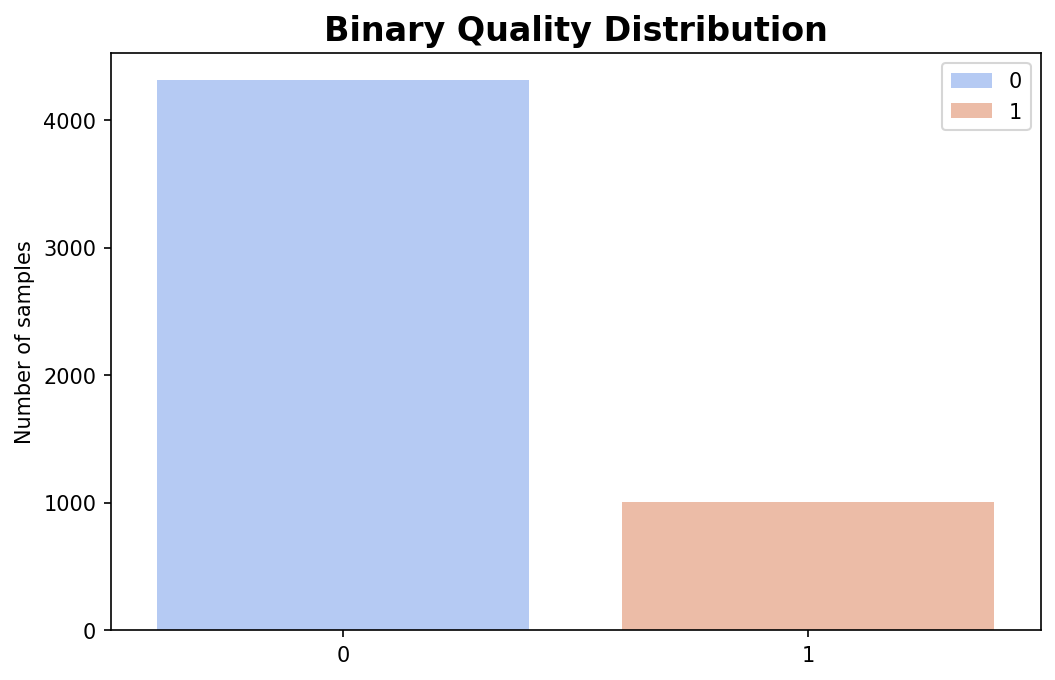

In [22]:
# Visualizing binary quality distribution
plt.figure(figsize=(8, 5), dpi=150)
sns.countplot(x=y.values, hue=y.values, palette="coolwarm")
plt.ylabel("Number of samples")
plt.title("Binary Quality Distribution", fontsize=16, fontweight="bold")

plt.savefig("../img/binary-quality-distribution.png")
plt.show()

I would create train/test splits and oversample only the train split to avoid data leakage


In [23]:
# Creating train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=33)

# Applying SMOTE to training split
smote = SMOTE(random_state=33)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

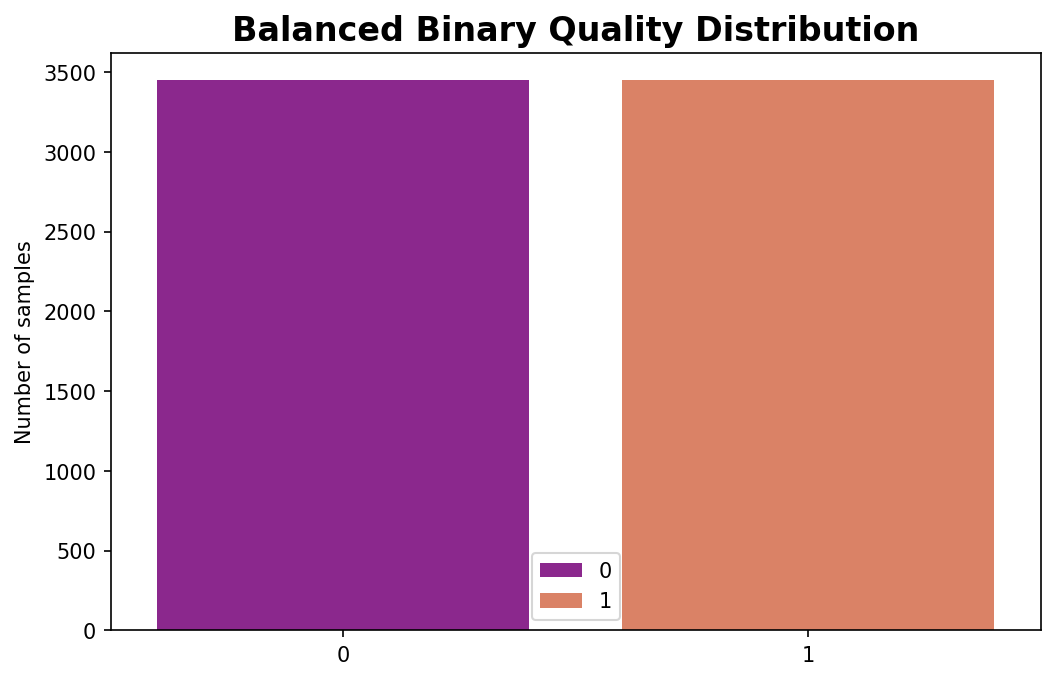

In [ ]:
# Visualizing new target distribution
plt.figure(figsize=(8, 5), dpi=150)
sns.countplot(x=y_train_resampled.values, hue=y_train_resampled.values, palette="plasma")
plt.ylabel("Number of samples")
plt.title("Balanced Binary Quality Distribution", fontsize=16, fontweight="bold")

plt.savefig("../img/balanced-binary-quality-distribution.png")
plt.show()


In [27]:
# Saving the processed datasets
# Combining the sampled (train) data back into a DataFrame
resampled_ds = pd.concat([
    pd.DataFrame(X_train_resampled, columns=X.columns),
    pd.Series(y_train_resampled, name="quality")
], axis=1)

print(resampled_ds.shape)

# Save to CSV
resampled_ds.to_csv("../dataset/wine-train-balanced.csv", index=False)

# Saving the test split
X_test.assign(quality=y_test).to_csv("../dataset/wine-test.csv", index=False)

resampled_ds.head()

(6898, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,quality
0,8.5,0.37,0.20,2.8,0.090,18.0,58.0,0.99800,3.34,0.70,9.6,0,0
1,6.8,0.26,0.34,13.9,0.034,39.0,134.0,0.99490,3.33,0.53,12.0,1,0
2,7.9,0.72,0.01,1.9,0.076,7.0,32.0,0.99668,3.39,0.54,9.6,0,0
3,6.8,0.22,0.36,1.2,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,1,0
4,6.7,0.24,0.32,9.0,0.023,20.0,109.0,0.99262,3.34,0.35,12.6,1,0
